<a href="https://colab.research.google.com/github/Ojochideee/NLP-Resume-Matching-Job-Description/blob/main/NLP_RESUME_CHECKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df  = pd.read_csv("/content/dataset_indeed-scraper_2025-06-15_19-35-25-332.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company                         100 non-null    object 
 1   companyInfo/companyDescription  79 non-null     object 
 2   companyInfo/companyLogo         85 non-null     object 
 3   companyInfo/companySize         0 non-null      float64
 4   companyInfo/companySize/max     43 non-null     float64
 5   companyInfo/companySize/min     84 non-null     float64
 6   companyInfo/indeedUrl           100 non-null    object 
 7   companyInfo/rating              93 non-null     float64
 8   companyInfo/reviewCount         93 non-null     float64
 9   companyInfo/url                 88 non-null     object 
 10  description                     100 non-null    object 
 11  descriptionHTML                 100 non-null    object 
 12  externalApplyLink               77 no

In [16]:
columns_to_keep = [
    'company', 'description', 'positionName', 'location',
    'rating', 'reviewsCount', 'searchInput/position', 'searchInput/country'
]

In [17]:
df_processed = df[columns_to_keep]

In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               100 non-null    object 
 1   description           100 non-null    object 
 2   positionName          100 non-null    object 
 3   location              100 non-null    object 
 4   rating                100 non-null    float64
 5   reviewsCount          100 non-null    int64  
 6   searchInput/position  100 non-null    object 
 7   searchInput/country   100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [19]:
df_processed.head()

,company,description,positionName,location,rating,reviewsCount,searchInput/position,searchInput/country
0,Google,Minimum qualifications:\nBachelor's degree or ...,"Escalations Analyst, Search and Generative AI","Dublin, County Dublin",4.3,5909,data analyst,IE
1,Irish Pensions & Finance,"_*In light of our ever-expanding client base, ...",Junior Data Analyst,"DUBLIN 15, County Dublin",4.5,13,data analyst,IE
2,Optum,Optum is a global organisation that delivers c...,Product Owner- Actuarial Data & Analytics Plat...,"Dublin, County Dublin",3.3,6842,data analyst,IE
3,Hollister ULC,We Make Life More Rewarding and Dignified\n\nL...,"Senior Business Systems Analyst, SAP","Ballina, County Mayo",3.5,149,data analyst,IE
4,paypal,The Company\n\nPayPal has been revolutionizing...,Risk & Compliance Oversight Analyst,"Dublin, County Dublin",3.8,1932,data analyst,IE


In [20]:
import re #import module to work regular expressions
import nltk #Python program that can be used for NLP
from nltk.corpus import stopwords #WORDS THAT ARE DEEMED INSIGNIFICANT IN TEXT ANALYSIS
from nltk.stem import WordNetLemmatizer # reduces words to their root form
from nltk.tokenize import word_tokenize

import string

from sklearn.feature_extraction.text import TfidfVectorizer

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
# Download NLTK resources (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize - involves breaking down text into smaller units such as words or phrases
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

In [23]:
# Apply to the description column
df_processed['clean_description'] = df_processed['description'].apply(clean_text)

# Check result
df_processed[['description', 'clean_description']].head()

,description,clean_description
0,Minimum qualifications:\nBachelor's degree or ...,minimum qualification bachelor degree equivale...
1,"_*In light of our ever-expanding client base, ...",light everexpanding client base looking enthus...
2,Optum is a global organisation that delivers c...,optum global organisation delivers care aided ...
3,We Make Life More Rewarding and Dignified\n\nL...,make life rewarding dignified location ballina...
4,The Company\n\nPayPal has been revolutionizing...,company paypal revolutionizing commerce global...


In [25]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_processed['clean_description'])

# Match Resumes to Job Descriptions

In [27]:
with open('/content/resume.txt', 'r', encoding='utf-8') as file:
    resume_text = file.read()

In [28]:
# Clean just like job description df
clean_resume = clean_text(resume_text)

In [29]:
clean_resume

'tonia ameh dublin ireland anthoniaamehgmailcom project linkedin summary data analyst year experience turning complex data clear actionable insight across tech education sector skilled sql python power bi tableau handson expertise relational database etl process data visualisation known improving data quality streamlining workflow supporting strategic decision wellstructured analysis passionate using data solve realworld problem drive business outcome area expertise data analysis interpretation problem solving critical thinking client satisfaction improvement data quality integrity project workflow management market trend analysis kpi tracking business reporting stakeholder engagement insight strategy development fraud detection risk analysis professional experience mec remote ireland insight analyst risk compliance focus present analysed student application using sql excel detect fraud flagged highrisk case review investigated suspicious profile verifying document global institution b

In [30]:
# Combine resume and job descriptions
corpus = [clean_resume] + df_processed['clean_description'].tolist()

In [31]:
# Vectorize
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)

In [33]:
resume_vector = vectors[0]
job_vectors = vectors[1:]

similarities = cosine_similarity(resume_vector, job_vectors).flatten()
df['similarity_score'] = similarities

In [34]:
# Rank and label
df = df.sort_values(by='similarity_score', ascending=False)

def label_match(score):
    if score >= 0.6:
        return "Match"
    elif score >= 0.3:
        return "Partial Match"
    else:
        return "No Match"

df['match_label'] = df['similarity_score'].apply(label_match)

In [35]:
# View result
df[['positionName', 'company', 'similarity_score', 'match_label']]


,positionName,company,similarity_score,match_label
92,Data Analytics Engineer,Mediolanum International Funds Limited,0.303794,Partial Match
94,Data Analytics Engineer,Mediolanum International Funds Limited,0.303794,Partial Match
59,Business Analyst,Wigmore IT Group,0.239427,No Match
11,"Data Analytics Engineer (Dublin, Hybrid)",GTreasury,0.223900,No Match
93,"Sr. Business Intelligence Engineer (Dublin, Hy...",GTreasury,0.219911,No Match
...,...,...,...,...
33,Global Collections Analyst,Logitech,0.046533,No Match
55,Financial Reporting Analyst,Millennium Management,0.042779,No Match
50,Business Analyst,Intellect,0.041193,No Match
80,Quantitative Researcher - Execution Services,Millennium Management,0.032954,No Match


# PERSONAL TWEEK
I am trying to create an interface that shows the words from the job description missing from your resume.


In [36]:
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
all_text = ' '.join(df_processed['clean_description'].tolist())

In [38]:
tokens = nltk.word_tokenize(all_text)
word_freq = Counter(tokens)

In [ ]:
top_words = word_freq.most_common(50)  # Adjust number as needed

# Print nicely
for word, freq in top_words:
    print(f"{word}: {freq}")

data: 690
business: 598
team: 503
experience: 471
work: 390
skill: 282
process: 282
support: 238
role: 233
analysis: 228
management: 227
opportunity: 207
solution: 203
ability: 195
working: 193
strong: 183
service: 179
customer: 174
risk: 162
global: 160
product: 160
reporting: 158
technology: 157
system: 157
across: 156
requirement: 155
help: 151
client: 146
company: 145
need: 144
analyst: 144
including: 143
year: 140
stakeholder: 139
development: 137
environment: 135
financial: 135
insight: 134
project: 132
tool: 127
communication: 126
people: 124
benefit: 122
knowledge: 121
ensure: 118
u: 114
analytics: 113
required: 113
platform: 111
provide: 110


In [40]:
# Top 30 words
top_keywords = [word for word, freq in word_freq.most_common(500)]
print("Top Job Keywords:\n", top_keywords)

Top Job Keywords:
 ['data', 'business', 'team', 'experience', 'work', 'skill', 'process', 'support', 'role', 'analysis', 'management', 'opportunity', 'solution', 'ability', 'working', 'strong', 'service', 'customer', 'risk', 'global', 'product', 'reporting', 'technology', 'system', 'across', 'requirement', 'help', 'client', 'company', 'need', 'analyst', 'including', 'year', 'stakeholder', 'development', 'environment', 'financial', 'insight', 'project', 'tool', 'communication', 'people', 'benefit', 'knowledge', 'ensure', 'u', 'analytics', 'required', 'platform', 'provide', 'job', 'develop', 'key', 'quality', 'information', 'employee', 'technical', 'within', 'strategy', 'ireland', 'make', 'identify', 'status', 'performance', 'new', 'culture', 'issue', 'application', 'policy', 'operation', 'responsibility', 'report', 'manage', 'part', 'analytical', 'best', 'career', 'world', 'drive', 'improvement', 'join', 'power', 'complex', 'impact', 'related', 'day', 'build', 'time', 'excellent', 'unde

In [41]:
# Tokenize cleaned resume
resume_tokens = nltk.word_tokenize(clean_resume)

# Compare
missing_keywords = [word for word in top_keywords if word not in resume_tokens]
present_keywords = [word for word in top_keywords if word in resume_tokens]

print("\n✅ Already in Resume:", present_keywords)
print("\n🔍 Missing in Resume (Consider Adding):", missing_keywords)



✅ Already in Resume: ['data', 'business', 'team', 'experience', 'skill', 'process', 'analysis', 'management', 'solution', 'risk', 'global', 'product', 'reporting', 'technology', 'across', 'requirement', 'client', 'need', 'analyst', 'year', 'stakeholder', 'development', 'insight', 'project', 'tool', 'knowledge', 'analytics', 'quality', 'technical', 'strategy', 'ireland', 'performance', 'application', 'operation', 'drive', 'improvement', 'power', 'complex', 'time', 'bi', 'user', 'using', 'ensuring', 'office', 'strategic', 'dublin', 'design', 'trend', 'professional', 'sap', 'supporting', 'delivery', 'market', 'expertise', 'area', 'problem', 'sql', 'excel', 'focus', 'decision', 'leadership', 'compliance', 'dashboard', 'learning', 'bachelor', 'implement', 'clear', 'agile', 'review', 'cloud', 'science', 'actionable', 'identifying', 'database', 'microsoft', 'metric', 'methodology', 'critical', 'datadriven', 'workflow', 'monitor', 'python', 'software', 'documentation', 'accuracy', 'engineer',

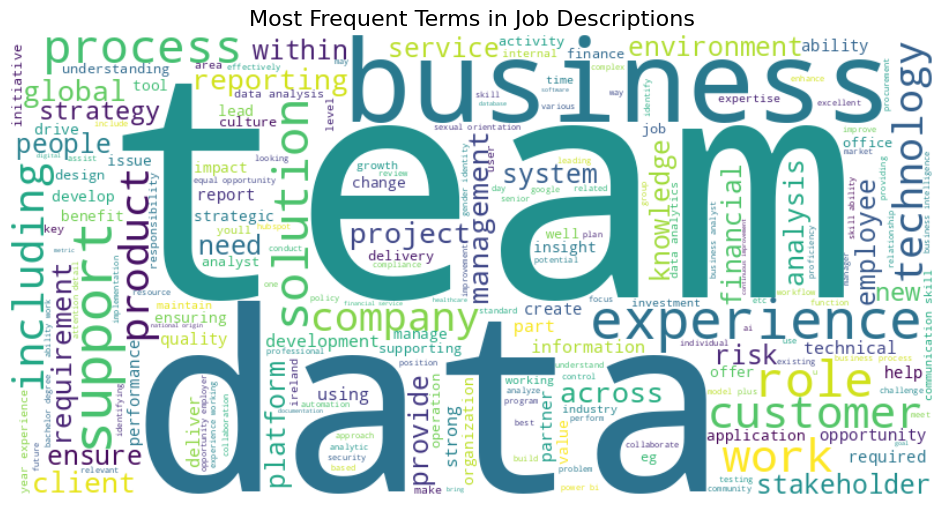

In [42]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Terms in Job Descriptions', fontsize=16)
plt.show()

# GRADIO APP INTERFACE


In [43]:
!pip install gradio nltk


In [46]:
import gradio as gr

In [47]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords, lemmatize
    cleaned = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token.isalnum() and token not in stop_words
    ]

    return cleaned


In [50]:
def compare_resume_to_job(resume_text, job_description_text):
    resume_tokens = set(clean_text(resume_text))
    job_tokens = clean_text(job_description_text)

    # Get top N keywords from job description
    job_keywords = [word for word, _ in Counter(job_tokens).most_common(50)]

    present = [word for word in job_keywords if word in resume_tokens]
    missing = [word for word in job_keywords if word not in resume_tokens]

    match_score = round(len(present) / len(job_keywords) * 100, 2)

    result = f"""🔍 **Job Keyword Match Report**

✅ Present in Resume ({len(present)}):
{', '.join(present)}

❌ Missing from Resume ({len(missing)}):
{', '.join(missing)}

📊 Match Score: **{match_score}%**
"""
    return result


In [64]:
gr.Interface(
    fn=compare_resume_to_job,
    inputs=[
        gr.Textbox(lines=15, label="Paste your Resume"),
        gr.Textbox(lines=15, label="Paste Job Description"),
    ],
    outputs="text",
    title="Resume vs Job Description Keyword Matcher",
    description="Paste your resume and job description. It will show you which keywords are missing from your resume.",
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7929d3a2b51db42064.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
